In [1]:
import pandas as pd
import json
import numpy as np
from readability import Readability
import seaborn as sns
import ast
import matplotlib.pyplot as plt

# Import Files

In [2]:
readability_df = pd.read_csv('data/4-readability-measures.csv')
legibility_df = pd.read_csv('data/5-legibility-measures.csv')

In [3]:
legibility_df[['Firm', 'Link']]

,Firm,Link
0,Whiteleys Financial Management LLP,http://www.whiteleysaccountants.co.uk/terms-an...
1,Whiteleys Financial Management LLP,http://www.whiteleysaccountants.co.uk/privacy-...
2,Whiteleys Financial Management LLP,http://www.whiteleysaccountants.co.uk/news-ite...
3,Pioneer Point Partners LLP,https://pioneerpoint.com/privacy-and-cookie-po...
4,Engage Wealth Management Limited,https://engagewm.co.uk/privacy-notice/
...,...,...
4823,Heddington Insurance (U.K.) Limited,https://www.chevron.com/privacy
4824,Heddington Insurance (U.K.) Limited,https://www.chevron.com/terms-of-use
4825,Lady Grover's Hospital Fund for Officers' Fami...,https://forceshealth.co.uk/terms-and-conditions/
4826,Lady Grover's Hospital Fund for Officers' Fami...,https://forceshealth.co.uk/wordpress/wp-conten...


# Readability

## Input Mean Values

In [4]:
print(readability_df['Character Count'].isnull().sum())
print(readability_df['Average Sentence Length'].isnull().sum())
print(readability_df['Common Perc'].isnull().sum())

66
236
322


## Standardise and de-mean

In [5]:
data_df_readability_normalised = readability_df[['Character Count', 'Average Sentence Length', 'Common Perc']]
data_df_readability_normalised = (data_df_readability_normalised-data_df_readability_normalised.mean())/data_df_readability_normalised.std()
data_df_readability_normalised

,Character Count,Average Sentence Length,Common Perc
0,-2.246622,-0.472215,NaN
1,0.929172,-0.030178,0.733986
2,-0.766299,-0.075603,0.121466
3,NaN,-0.199950,0.642954
4,0.664944,0.311788,0.394641
...,...,...,...
4868,-0.026389,0.053341,0.677098
4869,0.152827,NaN,NaN
4870,-0.038036,0.030706,-1.165469
4871,-1.197441,NaN,NaN


- higher characters = worse readability
- higher average sentence length = worse readability
- higher common perc = better readability

In [6]:
data_df_readability_normalised['Character Count'] = data_df_readability_normalised['Character Count'] * -1
data_df_readability_normalised['Average Sentence Length'] = data_df_readability_normalised['Average Sentence Length'] * -1

In [7]:
readability_df[['Character Count', 'Average Sentence Length', 'Common Perc']] = data_df_readability_normalised

## Combined Readability Score

In [8]:
readability_df['Readability Score'] = (readability_df['Character Count'] + readability_df['Average Sentence Length'] + readability_df['Common Perc'])/3
readability_df = readability_df.sort_values(by=['Readability Score'], axis=0, ascending=False)
readability_df

,Unnamed: 0,Firm,Industry,Link,Average Sentence Length,Character Count,Common Perc,Readability Score
3639,3639,Railway Enginemen's Assurance Society Limited,Credit Institutions,https://www.enginemens.co.uk/cookie-policy/,0.619412,3.452200,0.768131,1.613248
3638,3638,Railway Enginemen's Assurance Society Limited,Credit Institutions,https://www.enginemens.co.uk/cookie-policy/,0.619412,3.452200,0.768131,1.613248
893,893,Zanbato UK Limited,Investment Firms,https://www.google.com/url?q=https://www.hello...,0.455860,3.452200,0.792669,1.566910
1572,1572,Oberon Investments Limited,Investment Firms,https://oberoninvestments.com/cookie-policy/,0.321748,3.452200,0.789009,1.520986
104,104,Lyxor Asset Management UK LLP,Investment Firms,http://www.lyxoretf.co.uk/en/instit/page/priva...,0.750253,3.452200,0.218466,1.473640
...,...,...,...,...,...,...,...,...
4849,4849,National Bank of Greece SA,Banks,https://www.nbg.gr/-/jssmedia/Files/Footer/ter...,NaN,0.851208,NaN,NaN
4852,4852,The Governor and Company of the Bank of Ireland,Banks,https://www.bankofireland.com/legal/cookies/,NaN,-1.632864,NaN,NaN
4855,4855,Western Union International Bank GmbH,Banks,https://www.westernunion.com/gb/en/legal/terms...,NaN,-1.469934,NaN,NaN
4869,4869,Heddington Insurance (U.K.) Limited,Insurers,https://www.chevron.com/terms-of-use,NaN,-0.152827,NaN,NaN


## Graphs

In [9]:
pd.DataFrame(readability_df.groupby(by=['Industry'])['Readability Score'].median())

,Readability Score
Industry,
Banks,-0.015980
Building Societies,0.058309
Credit Institutions,0.012092
Insurers,-0.073003
Investment Firms,0.013694


In [10]:
pd.DataFrame(readability_df.groupby(by=['Industry'])['Readability Score'].mean())

,Readability Score
Industry,
Banks,-0.033351
Building Societies,0.057201
Credit Institutions,-0.052966
Insurers,-0.147720
Investment Firms,0.026585


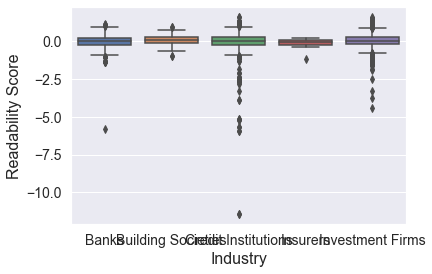

In [11]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set(font_scale=1.5)

sns.boxplot(data=readability_df, x='Industry', y='Readability Score', order=['Banks', 'Building Societies','Credit Institutions','Insurers','Investment Firms'])
plt.xlabel('Industry', fontsize=16);
plt.ylabel('Readability Score', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('images/6-readability_graph.png')

# Legibility

## Checking Distribution

(-0.4, 0.4)

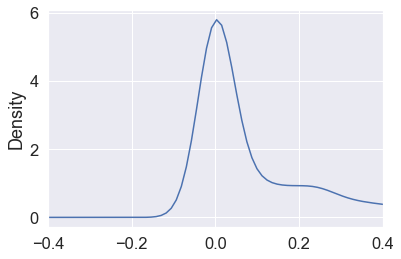

In [12]:
legibility_df['Bullet/numbered point Ratio'].plot(kind='kde')
plt.xlim(-0.4, 0.4)
# somewhat normal distribution, with strong outliers noticeable

(-0.15, 0.15)

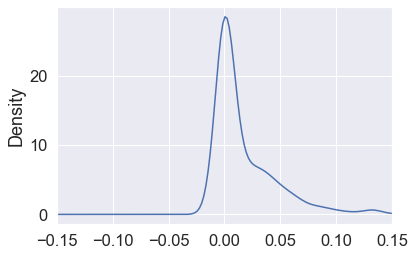

In [13]:
legibility_df['Bold text ratio'].plot(kind='kde')
plt.xlim(-0.15, 0.15)

# somewhat normal distribution, with strong outliers noticeable

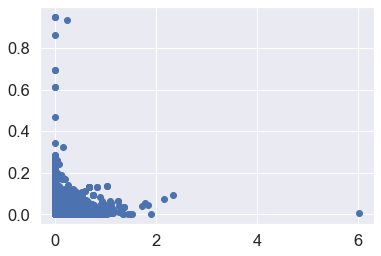

In [14]:
plt.scatter(legibility_df['Bullet/numbered point Ratio'], legibility_df['Bold text ratio'])
plt.show()

## Combined Legibility Score

In [15]:
df1 = pd.DataFrame(legibility_df, columns=['Firm', 'Bullet/numbered point Ratio', 'Bold text ratio'])
df2 = pd.DataFrame(legibility_df, columns=['Firm', 'Headers ratio', 'LH/FS Ratio'])
final_df = pd.concat([df1, df2], axis=1)
final_df

,Firm,Bullet/numbered point Ratio,Bold text ratio,Firm,Headers ratio,LH/FS Ratio
0,Whiteleys Financial Management LLP,0.000000,0.000000,Whiteleys Financial Management LLP,0.000000,4.206838
1,Whiteleys Financial Management LLP,0.194036,0.035785,Whiteleys Financial Management LLP,0.043340,4.206838
2,Whiteleys Financial Management LLP,0.000000,0.000000,Whiteleys Financial Management LLP,0.000000,4.206838
3,Pioneer Point Partners LLP,NaN,NaN,Pioneer Point Partners LLP,0.000000,0.000000
4,Engage Wealth Management Limited,0.242496,0.059447,Engage Wealth Management Limited,0.000000,0.571707
...,...,...,...,...,...,...
4823,Heddington Insurance (U.K.) Limited,0.000000,0.000000,Heddington Insurance (U.K.) Limited,0.000000,0.743668
4824,Heddington Insurance (U.K.) Limited,0.000000,0.030899,Heddington Insurance (U.K.) Limited,0.000000,0.743668
4825,Lady Grover's Hospital Fund for Officers' Fami...,0.245714,0.000000,Lady Grover's Hospital Fund for Officers' Fami...,0.007619,0.814008
4826,Lady Grover's Hospital Fund for Officers' Fami...,0.000000,0.000000,Lady Grover's Hospital Fund for Officers' Fami...,0.000000,0.000000


In [16]:
# Find combined metrics (average of standardised ratios) to find the most & least legible T&Cs

# Step 1: Standardise all 4 metrics

from sklearn.preprocessing import StandardScaler
final_df.drop(['Firm'], axis=1, inplace=True)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(final_df)
standardized_df = pd.DataFrame(standardized_data, columns=final_df.columns)

# Step 2: Get the mean of the 4 standardised metrics for each link and add new column for this combined metric
standardized_df['Mean'] = standardized_df.mean(axis=1)
index_df = legibility_df[['Firm', 'Link']]
urls = pd.read_excel('data/2-urls-all.xlsx')
index_df['Industry'] = urls['Industry'].copy()
final_final_df = pd.concat([index_df, standardized_df], axis = 1)
final_final_df

<ipython-input-16-5f1f27d9dd06>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_df['Industry'] = urls['Industry'].copy()


,Firm,Link,Industry,Bullet/numbered point Ratio,Bold text ratio,Headers ratio,LH/FS Ratio,Mean
0,Whiteleys Financial Management LLP,http://www.whiteleysaccountants.co.uk/terms-an...,Investment Firms,-0.516318,-0.435440,-0.402123,0.838180,-0.128926
1,Whiteleys Financial Management LLP,http://www.whiteleysaccountants.co.uk/privacy-...,Investment Firms,0.310870,0.321272,0.394490,0.838180,0.466203
2,Whiteleys Financial Management LLP,http://www.whiteleysaccountants.co.uk/news-ite...,Investment Firms,-0.516318,-0.435440,-0.402123,0.838180,-0.128926
3,Pioneer Point Partners LLP,https://pioneerpoint.com/privacy-and-cookie-po...,Investment Firms,NaN,NaN,-0.402123,-0.340517,-0.371320
4,Engage Wealth Management Limited,https://engagewm.co.uk/privacy-notice/,Investment Firms,0.517458,0.821614,-0.402123,-0.180332,0.189154
...,...,...,...,...,...,...,...,...
4823,Heddington Insurance (U.K.) Limited,https://www.chevron.com/privacy,Insurers,-0.516318,-0.435440,-0.402123,-0.132151,-0.371508
4824,Heddington Insurance (U.K.) Limited,https://www.chevron.com/terms-of-use,Insurers,-0.516318,0.217944,-0.402123,-0.132151,-0.208162
4825,Lady Grover's Hospital Fund for Officers' Fami...,https://forceshealth.co.uk/terms-and-conditions/,Insurers,0.531179,-0.435440,-0.262081,-0.112443,-0.069696
4826,Lady Grover's Hospital Fund for Officers' Fami...,https://forceshealth.co.uk/wordpress/wp-conten...,Insurers,-0.516318,-0.435440,-0.402123,-0.340517,-0.423600


In [17]:
final_final_df.groupby('Industry')['Mean'].mean()

Industry
Banks                 -0.033090
Building Societies    -0.001421
Credit Institutions    0.018564
Insurers               0.010528
Investment Firms      -0.008034
Name: Mean, dtype: float64

## Graphs

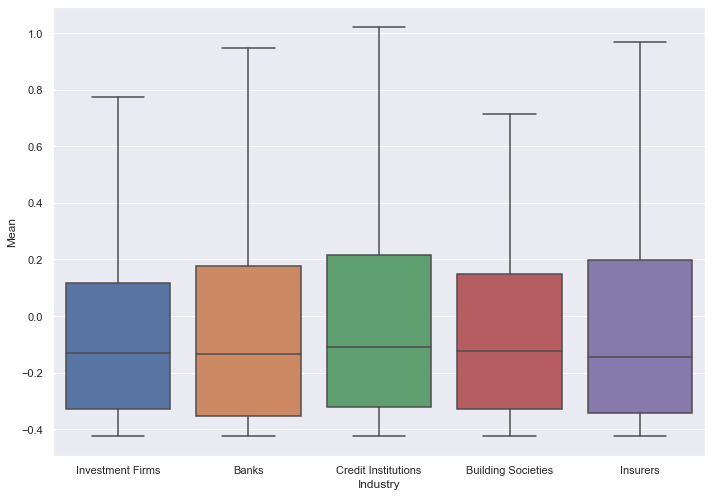

In [18]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
boxplot = sns.boxplot(x='Industry', y='Mean', data=final_final_df, showfliers=False)

boxplot_fig = boxplot.get_figure()
boxplot_fig.savefig('images/6-legibility_graph.png')

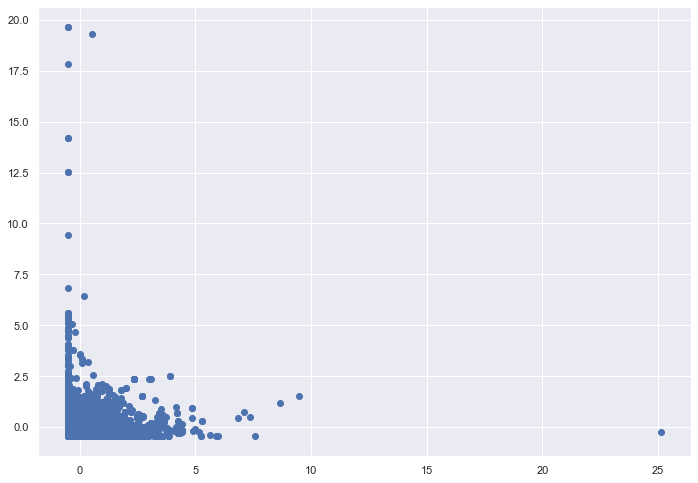

In [19]:
plt.scatter(standardized_df['Bullet/numbered point Ratio'], standardized_df['Bold text ratio'])
plt.show()

# Overall (Readability + Legibility)

In [27]:
readability_df = readability_df
legibility_df = final_final_df
legibility_df = legibility_df.drop_duplicates(subset=['Firm','Link'])

In [30]:
data_df_overall = pd.merge(readability_df[['Firm','Link','Industry','Readability Score']], legibility_df[['Firm','Link','Mean']], how='left', left_on = ['Firm', 'Link'], right_on = ['Firm', 'Link'])

In [31]:
data_df_overall['Combined Score'] = data_df_overall['Readability Score'] + data_df_overall['Mean']
data_df_overall.sort_values(by=['Combined Score'], ascending=False)

,Firm,Link,Industry,Readability Score,Mean,Combined Score
4064,Simon Robertson Associates LLP,https://www.evercore.com/gdpr-privacy-notice/,Investment Firms,-0.436728,6.097484,5.660755
706,Columbia Threadneedle REP AM plc,https://www.rep.columbiathreadneedle.com/terms...,Investment Firms,0.385341,4.633038,5.018379
705,Columbia Threadneedle REP AM plc,http://www.rep.columbiathreadneedle.com/rep/te...,Investment Firms,0.385341,4.631099,5.016440
183,FUTURE PLANET CAPITAL (VENTURES) LIMITED,https://futureplanetcapital.com/privacy-policy,Investment Firms,0.713009,4.147829,4.860838
1653,Assure Hedge (UK) Limited,https://www.assurehedge.com/cookie-policy/,Investment Firms,0.127002,4.465370,4.592372
...,...,...,...,...,...,...
4868,National Bank of Greece SA,https://www.nbg.gr/-/jssmedia/Files/Footer/ter...,Banks,NaN,-0.423600,NaN
4869,The Governor and Company of the Bank of Ireland,https://www.bankofireland.com/legal/cookies/,Banks,NaN,0.726005,NaN
4870,Western Union International Bank GmbH,https://www.westernunion.com/gb/en/legal/terms...,Banks,NaN,-0.025002,NaN
4871,Heddington Insurance (U.K.) Limited,https://www.chevron.com/terms-of-use,Insurers,NaN,-0.208162,NaN


In [32]:
pd.DataFrame(data_df_overall.groupby(by=['Industry'])['Combined Score'].mean())

,Combined Score
Industry,
Banks,-0.074547
Building Societies,0.055120
Credit Institutions,-0.018664
Insurers,-0.207810
Investment Firms,0.036972


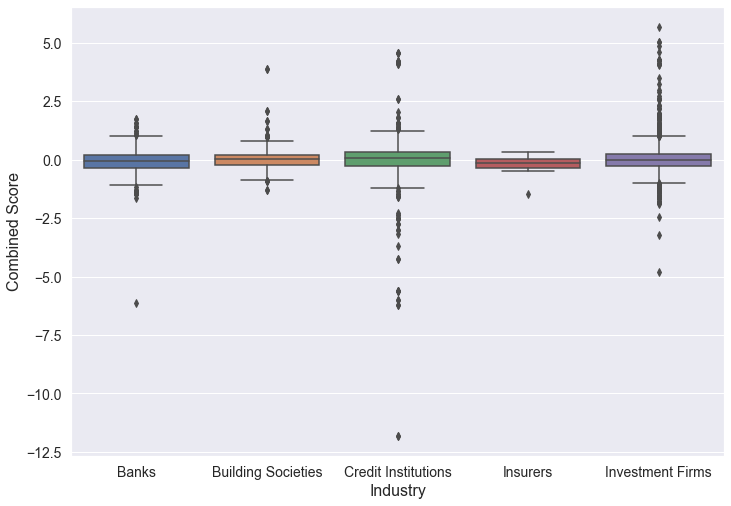

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)

sns.boxplot(data=data_df_overall, x='Industry', y='Combined Score', order=['Banks', 'Building Societies','Credit Institutions','Insurers','Investment Firms'])
plt.xlabel('Industry', fontsize=16);
plt.ylabel('Combined Score', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('images/6-combined-graph.png')